In this notebook we calculate the transition rate from observed transitions in the rotated double well.

In [3]:
import xarray as xr
import sys
from tqdm.notebook import tqdm
import os
import matplotlib.pyplot as plt
import numpy as np

## Opening transition time data

In [46]:
def get_params_from_name(file_name):
    
    # Numbers in name
    numbers = [int(s) for s in file_name if s.isdigit()]
    
    # Getting Alpha
    if numbers[1] == 2:
        alpha = float(f'{numbers[0]}.{numbers[1]}{numbers[2]}')
    else:
        alpha = float(f'{numbers[0]}.{numbers[1]}')
        
    # Getting eps
    zeros_length = len([x for x in numbers if x==0])  
    if sum(numbers[:2]) == 0:
        eps = 10 ** (2 - zeros_length)
        
    else:
        eps = 10 ** (1 - zeros_length)
    
    return alpha, eps

(0.0, 0.001)

In [98]:
transition_time_dir = 'transition-time-data/c2h/'
alphas = [0.0, 0.25, 0.5, 1.0]
time_data = {}
for a in alphas:
    time_data[a] = {}
    
for file in os.listdir(transition_time_dir):
    alpha, eps = get_params_from_name(file)
    if eps == 0.1:
        da = xr.open_dataset(transition_time_dir + file).to_array()
        da.name = 'Transition_Time'
        da.attrs = {'alpha':alpha, 'epsilon':eps} # should really save with this
        time_data[alpha] = da 

In [103]:
for da in list(time_data.values()):
    print(da.mean().item())

5.022587108013938
4.843648909743307
4.619399652691641
3.7036199095022626


## Plotting Transition Time Distributions

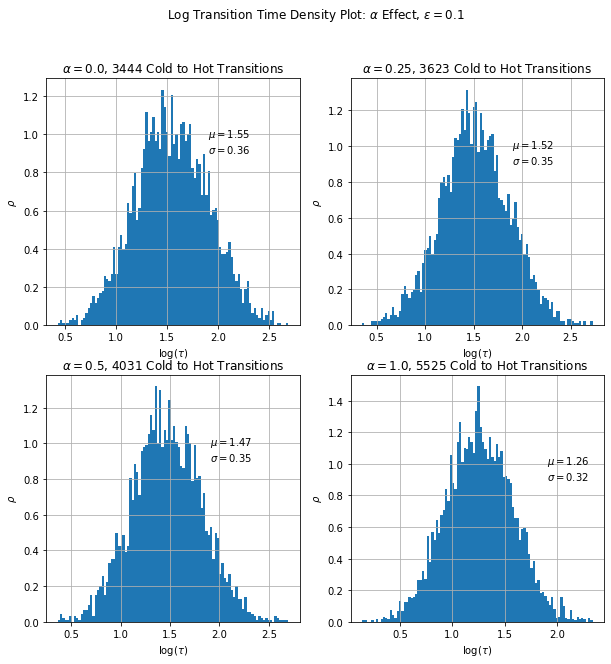

In [148]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

ax = axes.flatten()


def log_hist_plot(da, ax):
    log_da = np.log(da)
    count, bins, hist = log_da.plot.hist(density=True, bins=100, ax=ax)
    ax.set_ylabel('$\\rho$')
    ax.set_xlabel('$\\log(\\tau)$')
    ax.grid()
    ax.set_title(f'$\\alpha =${da.alpha}, {da.values.size} Cold to Hot Transitions')
    ax.text(1.9, 0.9, f'$\\mu =${log_da.mean().item():.2f}\n$\\sigma=${log_da.std().item():.2f}')
#     ax.text(0.4, 0.9, f'$\\alpha =${da.alpha}')
    return

for i, ax in enumerate(axes.flatten()):
    alpha = alphas[i]
    data = time_data[alpha]
    log_hist_plot(data, ax)
    
fig.suptitle('Log Transition Time Density Plot: $\\alpha$ Effect, $\\epsilon=0.1$')
fig.show()

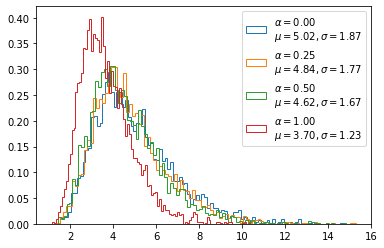

In [170]:
for a in alphas:
    data = time_data[a]
    plt.hist(data, density=True, bins=100, histtype='step',
             label=f'$\\alpha =${a:.2f}\n$\\mu =${data.mean().item():.2f}$, \\sigma=${data.std().item():.2f}')
plt.legend()
plt.show()

In [160]:
npfor a in alphas:
    data = time_data[a]exp(1.55)

4.711470182590742

In [179]:
eps = 0.1
np.exp(0.498/eps) * eps

14.547438165360994

In [178]:
0.1 * np.log(5)

0.16094379124341004